## RAPPEL DES DEUX PREMIERS JOURS

### Python pour la data science

#### Objectif :
Récupérez les données des puits en Tanzanie, représentez-les sur un plan

Importez les bibliothèques nécéssaires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importez les données

In [3]:
frame_tanzanie=pd.read_csv("water-tanzania.csv")

In [4]:
frame_tanzanie.shape

(59400, 40)

In [5]:
frame_tanzanie.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
frame_tanzanie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [7]:
frame_tanzanie.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
import pandas_profiling

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
pandas_profiling.ProfileReport(frame_tanzanie)

Number of variables,40
Number of observations,59400
Total Missing (%),1.9%
Total size in memory,18.1 MiB
Average record size in memory,320.0 B
Numeric,10
Categorical,28
Date,0
Text (Unique),0
Rejected,2
Distinct count,98


Nettoyez les données et préparez les données pour une data visualisation

In [11]:
#on élimine les données non géolocalisées
frame_tanzanie2=frame_tanzanie[frame_tanzanie["longitude"]>0]

In [13]:
frame_tanzanie2.shape

(57588, 40)

In [21]:
#on crée une variables qui ne contient pas de population >2000
frame_tanzanie2["population2"]=np.where(frame_tanzanie2["population"]>2000,2000,
                                       frame_tanzanie2["population"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Choisissez les data visualisations qui vous intéresse et sauvegardez les graphiques dans des fichiers

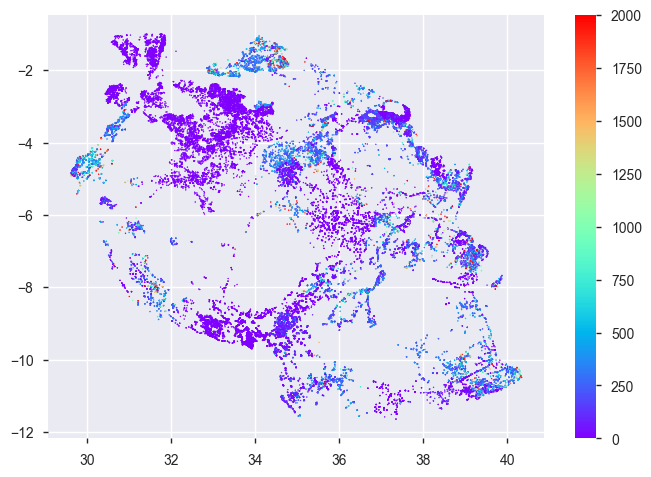

In [22]:
plt.scatter(frame_tanzanie2["longitude"],frame_tanzanie2["latitude"],s=0.5, 
            c=frame_tanzanie2["population2"],cmap=plt.get_cmap("rainbow"))
plt.colorbar()
#plt.scatter("longitude","latitude",data= frame_tanzanie2,s=0.5, 
#            c="population",cmap=plt.get_cmap("rainbow"))

#frame_tanzanie2.plot("longitude","latitude",kind='scatter')


Créez une fonction rassemblant toutes les transformations initiales

In [30]:
def preparation(frame):
    """Cette fonction permet de preparer mon jeu de données tanzanie"""
    frame_out=frame[frame["longitude"]>0]
    frame_out["population2"]=np.where(frame_out["population"]>2000,2000,frame_out["population"])
    return frame_out

In [31]:
frame_tanzanie3 =preparation(frame_tanzanie)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
